#Artificial Neural Network

Exercise for 26/03/2023
Estimate the location from WIFI Signal Strength

The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.

You can use ANN analysis for this exerise to improve the ANN performance.

#1. Path & Loading file

In [92]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [93]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [94]:
#Dataset for classification
path = "/content/drive/MyDrive/Colab Notebooks/202303_DL Module/wifi.csv"
df =  pd.read_csv(path)

#Step 3: Explore the dataset

In [95]:
df.shape

(2000, 8)

In [96]:
df.head(10)

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
5,-64,-55,-63,-66,-76,-88,-83,1
6,-65,-61,-65,-67,-69,-87,-84,1
7,-61,-63,-58,-66,-74,-87,-82,1
8,-65,-60,-59,-63,-76,-86,-82,1
9,-62,-60,-66,-68,-80,-86,-91,1


In [97]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
Wifi 1,-64,-68,-63,-61,-63,-64,-65,-61,-65,-62
Wifi 2,-56,-57,-60,-60,-65,-55,-61,-63,-60,-60
Wifi 3,-61,-61,-60,-68,-60,-63,-65,-58,-59,-66
Wifi 4,-66,-65,-67,-62,-63,-66,-67,-66,-63,-68
Wifi 5,-71,-71,-76,-77,-77,-76,-69,-74,-76,-80
Wifi 6,-82,-85,-85,-90,-81,-88,-87,-87,-86,-86
Wifi 7,-81,-85,-84,-80,-87,-83,-84,-82,-82,-91
Room,1,1,1,1,1,1,1,1,1,1


In [98]:
df.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [99]:
room_dummies = pd.get_dummies(df['Room'])

In [100]:
room_dummies.head(5)

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0


In [101]:
df = pd.concat([df,room_dummies], axis = 1)

In [102]:
df.head(5)

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room,1,2,3,4
0,-64,-56,-61,-66,-71,-82,-81,1,1,0,0,0
1,-68,-57,-61,-65,-71,-85,-85,1,1,0,0,0
2,-63,-60,-60,-67,-76,-85,-84,1,1,0,0,0
3,-61,-60,-68,-62,-77,-90,-80,1,1,0,0,0
4,-63,-65,-60,-63,-77,-81,-87,1,1,0,0,0


In [103]:
df =df.drop(['Room'], axis =1)

In [104]:
df.head(5)

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,1,2,3,4
0,-64,-56,-61,-66,-71,-82,-81,1,0,0,0
1,-68,-57,-61,-65,-71,-85,-85,1,0,0,0
2,-63,-60,-60,-67,-76,-85,-84,1,0,0,0
3,-61,-60,-68,-62,-77,-90,-80,1,0,0,0
4,-63,-65,-60,-63,-77,-81,-87,1,0,0,0


#Split Data Here

In [105]:
X = df.iloc[:,:7]
Y = df.iloc[:,7:]

In [106]:
Y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 1)

In [108]:
#print(X_train, X_test, Y_train, Y_test)

In [109]:
print("X_train shape is ", X_train.shape) 
print("Y_train shape is ", Y_train.shape) 
print("X_test shape is ", X_test.shape)
print("Y_test shape is ", Y_test.shape)

X_train shape is  (1600, 7)
Y_train shape is  (1600, 4)
X_test shape is  (400, 7)
Y_test shape is  (400, 4)


#Normalization

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
scaler = StandardScaler()

In [112]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #it reuse the deriaion value for above code 

In [113]:
print(X_train.shape)
print(X_test.shape)

(1600, 7)
(400, 7)



#Import Keras

In [114]:
from keras.models import Sequential
from keras.layers import Dense #linear equation

#Building Model Architecture

In [115]:
L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 7, activation = 'relu'))#first hidden layer (need to add input dimension)
model.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))

#output layer
model.add(Dense(4, activation= 'softmax'))

In [116]:
#Compiling the model, with loss function, evaluation & optimizer
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

#Training the Model

In [117]:
history =  model.fit(X_train, Y_train, epochs = 10, batch_size = 200, validation_data = (X_test, Y_test))

Epoch 1/10
8/8 [==============================] - 1s 30ms/step - loss: 1.1346 - accuracy: 0.7075 - val_loss: 0.9379 - val_accuracy: 0.8500
Epoch 2/10
8/8 [==============================] - 0s 7ms/step - loss: 0.8136 - accuracy: 0.8525 - val_loss: 0.6708 - val_accuracy: 0.8675
Epoch 3/10
8/8 [==============================] - 0s 7ms/step - loss: 0.5780 - accuracy: 0.8819 - val_loss: 0.4767 - val_accuracy: 0.9025
Epoch 4/10
8/8 [==============================] - 0s 8ms/step - loss: 0.4103 - accuracy: 0.9169 - val_loss: 0.3412 - val_accuracy: 0.9300
Epoch 5/10
8/8 [==============================] - 0s 7ms/step - loss: 0.2977 - accuracy: 0.9394 - val_loss: 0.2519 - val_accuracy: 0.9450
Epoch 6/10
8/8 [==============================] - 0s 7ms/step - loss: 0.2250 - accuracy: 0.9525 - val_loss: 0.1941 - val_accuracy: 0.9550
Epoch 7/10
8/8 [==============================] - 0s 11ms/step - loss: 0.1780 - accuracy: 0.9594 - val_loss: 0.1583 - val_accuracy: 0.9550
Epoch 8/10
8/8 [================

#Plotting Result 

<Figure size 432x288 with 0 Axes>

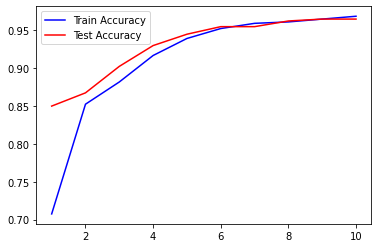

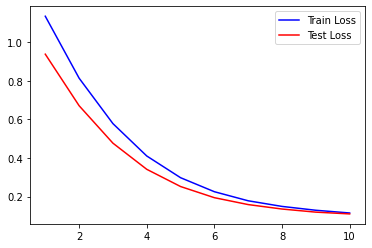

<Figure size 432x288 with 0 Axes>

In [118]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()


#Kernel Regularization
 Model with initializer and regularizer 


Kernel Regularization is the process of adding penalty factors to the network layers to alter the weight propagation through the layers which facilitate the model to converge optimally.


Kernel initializers are used to statistically initialise the weights in the model. This will generate the weights and distribute them, it can be used as the starting weights.


Regularization is a set of techniques that can prevent overfitting in neural networks and thus improve the accuracy of a Deep Learning model when facing completely new data from the problem domain.

In [119]:
from keras.layers import Dropout
from keras import initializers
from keras import regularizers
from keras.callbacks import EarlyStopping

In [120]:
#Building a linear stack of layers with the equantial model

L1 = 100
L2 = 100

model = Sequential()
model.add(Dense(L1, input_dim = 7, activation = 'relu', kernel_initializer= 'he_normal', kernel_regularizer = regularizers.l2(0.01)))#added regularizer & initializer here
model.add(Dense(L2, activation= 'relu'))# second hidden layer (do not need to add input dimension))

#output layer
#model.add(Dropout(rate = 0.2))
model.add(Dense(4, activation= 'softmax'))

In [121]:
#Compiling the model, with loss function, evaluation & optimizer
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'], optimizer = 'adam')

In [122]:
history =  model.fit(X_train, Y_train, epochs = 15, batch_size = 200, validation_data = (X_test, Y_test))

Epoch 1/15
8/8 [==============================] - 1s 34ms/step - loss: 3.1531 - accuracy: 0.5269 - val_loss: 2.6687 - val_accuracy: 0.7975
Epoch 2/15
8/8 [==============================] - 0s 7ms/step - loss: 2.5007 - accuracy: 0.8637 - val_loss: 2.3317 - val_accuracy: 0.9200
Epoch 3/15
8/8 [==============================] - 0s 7ms/step - loss: 2.2574 - accuracy: 0.9388 - val_loss: 2.1763 - val_accuracy: 0.9325
Epoch 4/15
8/8 [==============================] - 0s 9ms/step - loss: 2.1362 - accuracy: 0.9475 - val_loss: 2.0790 - val_accuracy: 0.9450
Epoch 5/15
8/8 [==============================] - 0s 9ms/step - loss: 2.0504 - accuracy: 0.9556 - val_loss: 2.0076 - val_accuracy: 0.9550
Epoch 6/15
8/8 [==============================] - 0s 7ms/step - loss: 1.9827 - accuracy: 0.9631 - val_loss: 1.9440 - val_accuracy: 0.9600
Epoch 7/15
8/8 [==============================] - 0s 10ms/step - loss: 1.9252 - accuracy: 0.9681 - val_loss: 1.8914 - val_accuracy: 0.9625
Epoch 8/15
8/8 [================

<Figure size 432x288 with 0 Axes>

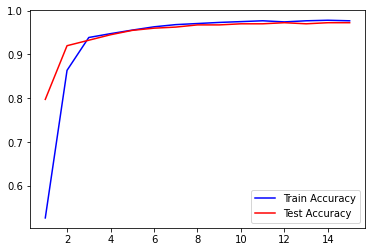

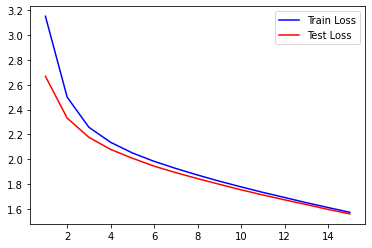

<Figure size 432x288 with 0 Axes>

In [123]:
acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc2)+1)

plt.plot(epochs, acc2, 'b', label = 'Train Accuracy')
plt.plot(epochs, val_acc, 'r', label = 'Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2, 'b', label = 'Train Loss')
plt.plot(epochs, val_loss, 'r', label = 'Test Loss')
plt.legend()
plt.figure()
